<a href="https://colab.research.google.com/github/PradoVarathan/AffymatrixDataAnalysis_via_R/blob/master/AgeBiasCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.pipeline as pl
import sklearn.linear_model as lm
import sklearn.preprocessing as sp


url = 'https://raw.githubusercontent.com/PradoVarathan/AgeBiasCorrection/main/Result_of_MLP_All_Test_Subjects.csv?token=GHSAT0AAAAAACEDOTEZ2BL4XNNALYDKPVMSZEQXGUA'
predicted_dataframe = pd.read_csv(url)

In [15]:
predicted_dataframe.head()

,eid,Predicted_Age,Actual_Age,Difference
0,1002424,57.666557,60,-2.333443
1,1003000,53.430205,51,2.430205
2,1003834,47.536562,40,7.536562
3,1003887,54.833906,51,3.833906
4,1004401,52.896949,57,-4.103051


### Plotting the original age vs the predicted age

(30.0, 80.0)

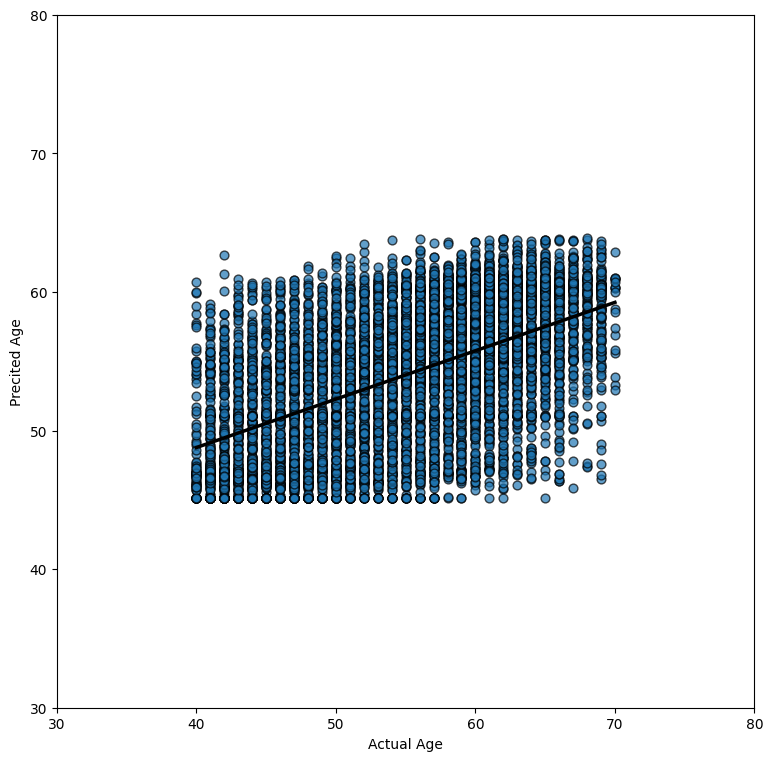

In [10]:
fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(list(predicted_dataframe['Actual_Age']),
                  list(predicted_dataframe['Predicted_Age']),s=40, alpha=0.7, edgecolors="k")
b, a = np.polyfit(list(predicted_dataframe['Actual_Age']),
                  list(predicted_dataframe['Predicted_Age']), deg=1)

xseq = np.linspace(min(predicted_dataframe['Actual_Age']),np.max(predicted_dataframe['Actual_Age']), num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.xlabel('Actual Age')
plt.ylabel('Precited Age')
plt.xlim([30,80])
plt.ylim([30,80])


## Plotting standardized Actual Age vs Difference between Predicted and Actual Age

In [16]:
predicted_dataframe['Actual_Age'] = predicted_dataframe['Actual_Age'] - np.mean(predicted_dataframe['Actual_Age'])


Text(0, 0.5, 'Difference')

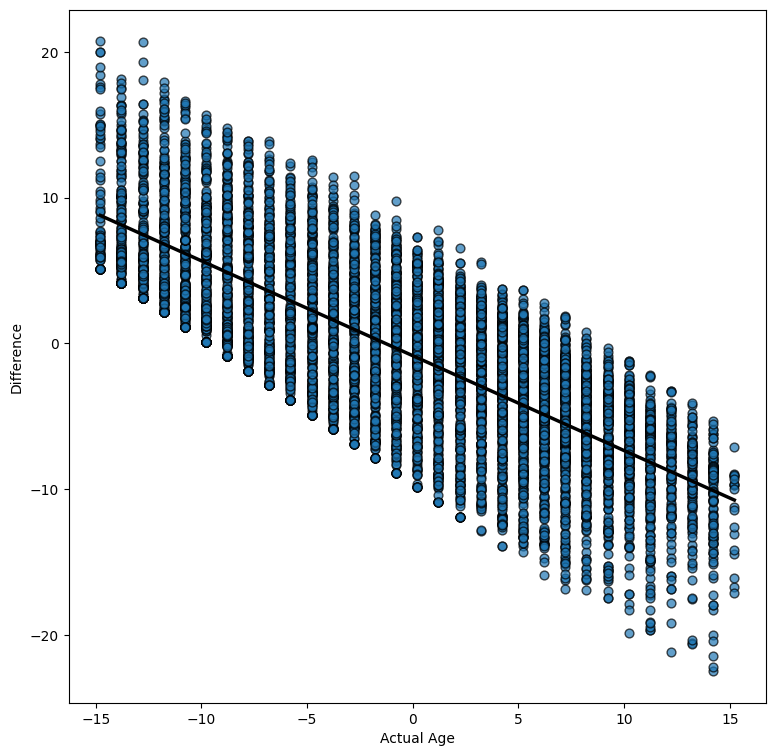

In [20]:
fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(list(predicted_dataframe['Actual_Age']),
                  list(predicted_dataframe['Difference']),s=40, alpha=0.7, edgecolors="k")
b, a = np.polyfit(list(predicted_dataframe['Actual_Age']),
                  list(predicted_dataframe['Difference']), deg=1)

xseq = np.linspace(min(predicted_dataframe['Actual_Age']),np.max(predicted_dataframe['Actual_Age']), num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.xlabel('Actual Age')
plt.ylabel('Difference')
#plt.xlim([30,80])
#plt.ylim([30,80])

## Correction of Age Bias

In [22]:
age_true = predicted_dataframe["Actual_Age"].values.reshape(-1, 1)
#age_true = age_true - np.mean(age_true)
#age_true_f = age_true
age_delta1= predicted_dataframe["Difference"].values.reshape(-1, 1)
model = LinearRegression().fit(age_true, age_delta1)
beta2 = model.coef_
delta2 = model.intercept_ # should be corrected age delta
corrected_age_predict= age_delta1 - age_true*beta2
corrected_age_predict = [l for sublist in corrected_age_predict for l in sublist]
age_true = predicted_dataframe["Actual_Age"] - np.mean(predicted_dataframe["Actual_Age"])
corrected_predicted_dataframe = pd.DataFrame(list(zip(corrected_age_predict, age_true)),index = predicted_dataframe.eid, columns = ['Delta_2','Actual_Age'])
#corrected_predicted_dataframe["Difference"] = corrected_predicted_dataframe["Corrected_Predicted_Age"] - corrected_predicted_dataframe["Actual_Age"]



Text(0, 0.5, 'Delta_2')

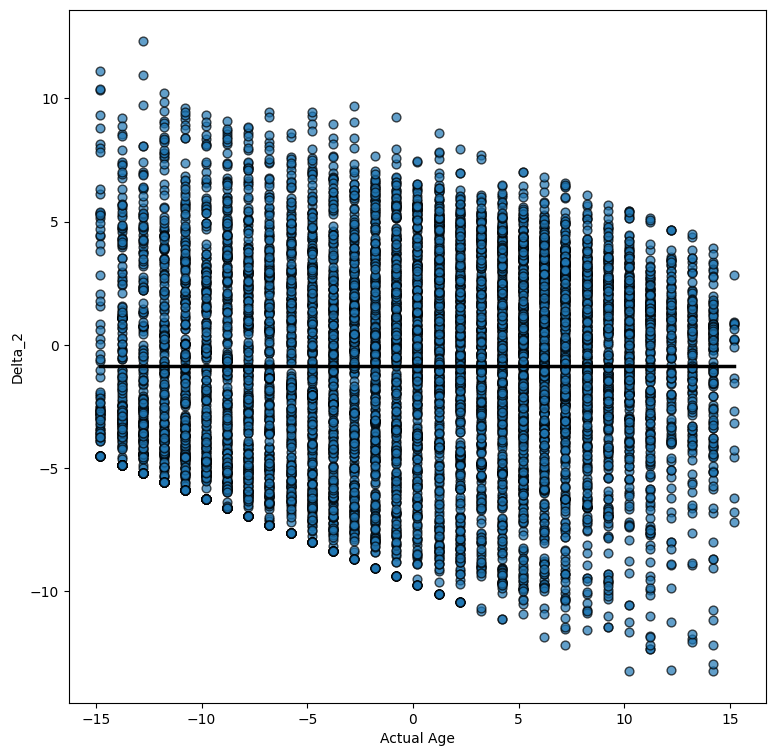

In [23]:
fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(list(corrected_predicted_dataframe['Actual_Age']),
                  list(corrected_predicted_dataframe['Delta_2']),s=40, alpha=0.7, edgecolors="k")
b, a = np.polyfit(list(corrected_predicted_dataframe['Actual_Age']),
                  list(corrected_predicted_dataframe['Delta_2']), deg=1)

xseq = np.linspace(min(corrected_predicted_dataframe['Actual_Age']),np.max(corrected_predicted_dataframe['Actual_Age']), num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.xlabel('Actual Age')
plt.ylabel('Delta_2')
#plt.xlim([30,80])
#plt.ylim([30,80])